<a href="https://colab.research.google.com/github/kiyuyeon/Ml_Dl/blob/master/20230620_chapter20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 9.39 MiB/s, done.


In [ ]:
# 기존의 이미지 갯수를 늘리는 작업 : 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255,          # 정규화
                                  horizontal_flip=True,     # 수평으로 뒤집기
                                  width_shift_range=0.1,    # 수평이동
                                  height_shift_range=0.1,   # 수직이동
                                  fill_mode='nearest' )     # 빈 공간을 채우는 방


train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',   # 학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',   # 테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
# CNN 모델 적용
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
#컴파일 옵션 설정.
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 조기 중단을 설정.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

#모델 실행
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 9s 229ms/step - loss: 0.7122 - accuracy: 0.5000 - val_loss: 0.6722 - val_accuracy: 0.6000
Epoch 2/100
32/32 [==============================] - 4s 127ms/step - loss: 0.6904 - accuracy: 0.5625 - val_loss: 0.6753 - val_accuracy: 0.5600
Epoch 3/100
32/32 [==============================] - 4s 116ms/step - loss: 0.6840 - accuracy: 0.5625 - val_loss: 0.6684 - val_accuracy: 0.6600
Epoch 4/100
32/32 [==============================] - 4s 118ms/step - loss: 0.6679 - accuracy: 0.6375 - val_loss: 0.6587 - val_accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 5s 143ms/step - loss: 0.6682 - accuracy: 0.6250 - val_loss: 0.6473 - val_accuracy: 0.6200
Epoch 6/100
32/32 [==============================] - 4s 118ms/step - loss: 0.6250 - accuracy: 0.6562 - val_loss: 0.5663 - val_accuracy: 0.6600
Epoch 7/100
32/32 [==============================] - 4s 116ms/step - loss: 0.5849 - accuracy: 0.7063 - val_loss: 0.5600 - val_accuracy: 0.6400

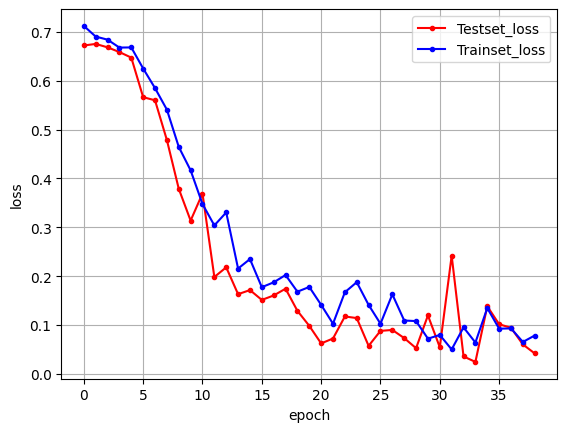

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()